In [1]:
pwd

'/home/caveman/Sync/LAB_Public/DesertOdorPlumes/wind_stations_demo'

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import load_windgps_data_to_pandas

In [4]:
# where your binary data files are
data_directory = 'large_sample_data'

# data column names and corresponding types based on the struct_t in the teensy firmware
# see: https://numpy.org/devdocs/user/basics.types.html
data_type = [('millis', '<u4'),  # uint32_t time;
             ('lat', np.single), # uint32_t test1;
             ('lon', np.single),
             ('gps_time', '<u4'),
             ('gps_date', '<u4'),
             ('wind', 'S128')] # char test2[24];

# how many fill bytes are there? from teensy code.
# would be nice if this could be determined automatically...
# probably can be done given size of the file, size of the header, size of the buffer from the datatype
number_fill_bytes = 90  # guess
number_data_records = 5 # guess

In [5]:
filenames = load_windgps_data_to_pandas.get_filenames(data_directory, '.bin')

In [6]:
filenames

['large_sample_data/0000001.bin',
 'large_sample_data/0000002.bin',
 'large_sample_data/0000003.bin',
 'large_sample_data/0000004.bin',
 'large_sample_data/0000005.bin',
 'large_sample_data/0000006.bin',
 'large_sample_data/0000007.bin',
 'large_sample_data/0000008.bin',
 'large_sample_data/0000009.bin',
 'large_sample_data/0000010.bin',
 'large_sample_data/0000011.bin',
 'large_sample_data/0000012.bin',
 'large_sample_data/0000013.bin',
 'large_sample_data/0000014.bin',
 'large_sample_data/0000015.bin',
 'large_sample_data/0000016.bin',
 'large_sample_data/0000017.bin',
 'large_sample_data/0000018.bin',
 'large_sample_data/0000019.bin',
 'large_sample_data/0000020.bin',
 'large_sample_data/0000021.bin',
 'large_sample_data/0000022.bin',
 'large_sample_data/0000023.bin',
 'large_sample_data/0000024.bin',
 'large_sample_data/0000025.bin',
 'large_sample_data/0000026.bin',
 'large_sample_data/0000027.bin',
 'large_sample_data/0000028.bin',
 'large_sample_data/0000029.bin',
 'large_sample

In [7]:
discover = load_windgps_data_to_pandas.discover_number_of_fill_bytes_and_data_records
number_data_records, number_fill_bytes = discover( filenames[0], data_type, 
                                                   number_data_records, number_fill_bytes,
                                                   verbose = False)

In [8]:
df = load_windgps_data_to_pandas.load_data_from_directory(data_directory, data_type, 
                                                                 number_data_records, number_fill_bytes)

In [9]:
df

,millis,lat,lon,gps_time,gps_date,wind
0,736,1000.000000,1000.000000,4294967295,0,b'S2 00.099 D 081 U -00.097 V -00.015 W 00....
1,758,1000.000000,1000.000000,4294967295,0,b'RHSH 00.32 AX -1792 AY -2816 AZ -16128 MD...
2,762,1000.000000,1000.000000,4294967295,0,b'\nS2 00.096 D 132 U -00.071 V 00.064 W 0...
3,862,1000.000000,1000.000000,4294967295,0,b'\nS2 00.055 D 186 U 00.005 V 00.054 W -0...
4,962,1000.000000,1000.000000,4294967295,0,b'\nS2 00.056 D 022 U -00.021 V -00.052 W -0...
...,...,...,...,...,...,...
559345,55933486,39.512928,-119.840248,8555900,130820,b'\nS2 00.122 D 302 U 00.104 V -00.065 W -0...
559346,55933586,39.512928,-119.840248,8555900,130820,b'\nS2 00.115 D 004 U -00.008 V -00.114 W -0...
559347,55933686,39.512928,-119.840248,8555900,130820,b'\nS2 00.115 D 322 U 00.070 V -00.091 W 0...
559348,55933786,39.512928,-119.840248,8555900,130820,b'\nS2 00.051 D 229 U 00.038 V 00.034 W -0...


In [10]:
df.millis

0              736
1              758
2              762
3              862
4              962
            ...   
559345    55933486
559346    55933586
559347    55933686
559348    55933786
559349    55933886
Name: millis, Length: 559350, dtype: uint32

In [11]:
df['millis'] # more robust

0              736
1              758
2              762
3              862
4              962
            ...   
559345    55933486
559346    55933586
559347    55933686
559348    55933786
559349    55933886
Name: millis, Length: 559350, dtype: uint32

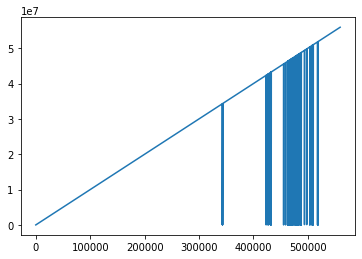

In [12]:
plt.plot(df['millis'])

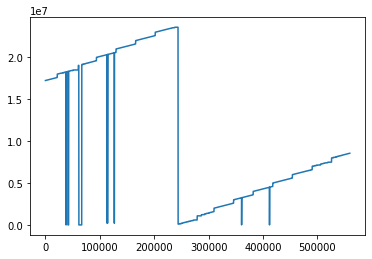

In [17]:
plt.plot(df['gps_time'][100:])

In [15]:
df['gps_time'][100]

17235500

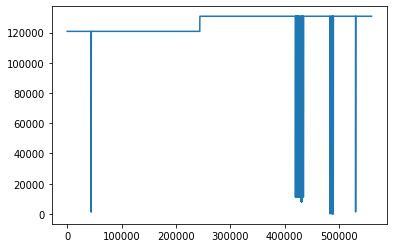

In [19]:
plt.plot(df['gps_date'][100:])

# To do:
* fix millis errors
* fix gps date errors
* fix gps time errors
* convert GPS time to epoch time
* parse wind string data

# Fix millis time (teensy time)

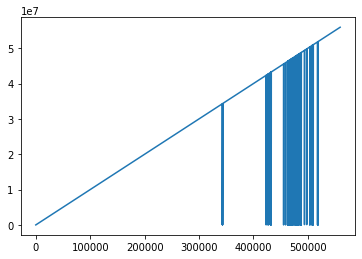

In [20]:
plt.plot(df.millis)

In [23]:
np.where(df.millis<4e7)[0]

array([     0,      1,      2, ..., 518326, 518546, 518766])

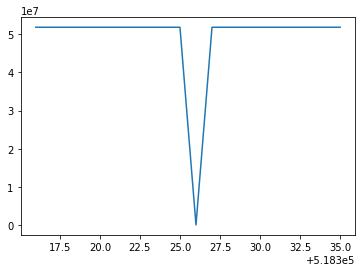

In [24]:
plt.plot(df.millis[518316:518336])

In [52]:
len(df.millis[518316:518336])

20

In [53]:
len( np.diff(df.millis[518316:518336]) )

19

In [25]:
df.millis[518326]

9180

In [27]:
df.millis[518766]

9180

In [28]:
np.diff(df[518316:518336].millis)

array([       100,        100,        100,        100,        100,
              100,        100,        100,        100, 4243144875,
         51822621,        100,        100,        100,        100,
              100,        100,        100,        100], dtype=uint32)

In [29]:
np.diff(df.millis.astype(int)[518316:518336])

array([      100,       100,       100,       100,       100,       100,
             100,       100,       100, -51822421,  51822621,       100,
             100,       100,       100,       100,       100,       100,
             100])

In [33]:
np.where(  np.diff(df[518316:518336].millis.astype(int))<0 )

(array([9]),)

In [35]:
df[518316:518336].millis.astype(int).values[9]

51831601

In [36]:
df[518316:518336].millis.astype(int).values[8]

51831501

In [37]:
df[518316:518336].millis.astype(int).values[10]

9180

In [40]:
# all the places where we have derivative < 0 = problem
idx = np.where( np.diff(df.millis.astype(int))<0 )[0]

In [41]:
idx

array([342985, 343205, 423281, 426471, 427681, 431425, 431645, 432411,
       432631, 455405, 459145, 463105, 463325, 463875, 464095, 464315,
       464865, 465085, 465305, 466075, 466295, 467065, 468055, 469265,
       469815, 470255, 470805, 471245, 472015, 472235, 473225, 475205,
       476745, 476965, 477185, 477731, 478175, 479165, 479935, 481145,
       482135, 482685, 482905, 483125, 484115, 486095, 486865, 487085,
       487635, 487855, 493795, 497975, 503475, 503915, 507655, 507875,
       508425, 508645, 509635, 509855, 517775, 518325, 518545, 518765])

In [42]:
idx + 1

array([342986, 343206, 423282, 426472, 427682, 431426, 431646, 432412,
       432632, 455406, 459146, 463106, 463326, 463876, 464096, 464316,
       464866, 465086, 465306, 466076, 466296, 467066, 468056, 469266,
       469816, 470256, 470806, 471246, 472016, 472236, 473226, 475206,
       476746, 476966, 477186, 477732, 478176, 479166, 479936, 481146,
       482136, 482686, 482906, 483126, 484116, 486096, 486866, 487086,
       487636, 487856, 493796, 497976, 503476, 503916, 507656, 507876,
       508426, 508646, 509636, 509856, 517776, 518326, 518546, 518766])

In [43]:
df.loc[ idx + 1 ]

,millis,lat,lon,gps_time,gps_date,wind
342986,13174,39.512966,-119.840256,2552300,130820,b'\nS2 00.136 D 307 U 00.108 V -00.082 W -0...
343206,13174,39.512951,-119.840256,2554500,130820,b'\nS2 00.109 D 306 U 00.088 V -00.064 W -0...
423282,11110,39.512917,-119.840263,5091300,130820,b'\nS2 00.059 D 323 U 00.035 V -00.048 W -0...
426472,11110,39.512966,-119.840279,5143200,130820,b'\nS2 00.063 D 229 U 00.048 V 00.041 W -0...
427682,11110,39.512978,-119.840271,5163300,130820,b'\nS2 00.073 D 292 U 00.067 V -00.028 W -0...
...,...,...,...,...,...,...
509856,1828,39.512901,-119.840233,7331200,130820,b'\nS2 00.034 D 290 U 00.032 V -00.012 W -0...
517776,8924,39.512848,-119.840225,7422500,130820,b'\nS2 00.105 D 301 U 00.090 V -00.053 W 0...
518326,9180,39.512848,-119.840225,7422500,130820,b'\nS2 00.166 D 301 U 00.142 V -00.087 W -0...
518546,9180,39.512848,-119.840225,7422500,130820,b'\nS2 00.015 D 205 U 00.006 V 00.014 W 0...


In [45]:
df.loc[idx+1, 'millis'] = np.nan

In [46]:
df.loc[ idx + 1 ]

,millis,lat,lon,gps_time,gps_date,wind
342986,NaN,39.512966,-119.840256,2552300,130820,b'\nS2 00.136 D 307 U 00.108 V -00.082 W -0...
343206,NaN,39.512951,-119.840256,2554500,130820,b'\nS2 00.109 D 306 U 00.088 V -00.064 W -0...
423282,NaN,39.512917,-119.840263,5091300,130820,b'\nS2 00.059 D 323 U 00.035 V -00.048 W -0...
426472,NaN,39.512966,-119.840279,5143200,130820,b'\nS2 00.063 D 229 U 00.048 V 00.041 W -0...
427682,NaN,39.512978,-119.840271,5163300,130820,b'\nS2 00.073 D 292 U 00.067 V -00.028 W -0...
...,...,...,...,...,...,...
509856,NaN,39.512901,-119.840233,7331200,130820,b'\nS2 00.034 D 290 U 00.032 V -00.012 W -0...
517776,NaN,39.512848,-119.840225,7422500,130820,b'\nS2 00.105 D 301 U 00.090 V -00.053 W 0...
518326,NaN,39.512848,-119.840225,7422500,130820,b'\nS2 00.166 D 301 U 00.142 V -00.087 W -0...
518546,NaN,39.512848,-119.840225,7422500,130820,b'\nS2 00.015 D 205 U 00.006 V 00.014 W 0...


In [47]:
df.millis.interpolate(inplace=True)

In [48]:
df.loc[idx+1]

,millis,lat,lon,gps_time,gps_date,wind
342986,34298194.0,39.512966,-119.840256,2552300,130820,b'\nS2 00.136 D 307 U 00.108 V -00.082 W -0...
343206,34320193.5,39.512951,-119.840256,2554500,130820,b'\nS2 00.109 D 306 U 00.088 V -00.064 W -0...
423282,42327568.0,39.512917,-119.840263,5091300,130820,b'\nS2 00.059 D 323 U 00.035 V -00.048 W -0...
426472,42646559.0,39.512966,-119.840279,5143200,130820,b'\nS2 00.063 D 229 U 00.048 V 00.041 W -0...
427682,42767556.0,39.512978,-119.840271,5163300,130820,b'\nS2 00.073 D 292 U 00.067 V -00.028 W -0...
...,...,...,...,...,...,...
509856,50984725.0,39.512901,-119.840233,7331200,130820,b'\nS2 00.034 D 290 U 00.032 V -00.012 W -0...
517776,51776702.5,39.512848,-119.840225,7422500,130820,b'\nS2 00.105 D 301 U 00.090 V -00.053 W 0...
518326,51831701.0,39.512848,-119.840225,7422500,130820,b'\nS2 00.166 D 301 U 00.142 V -00.087 W -0...
518546,51853700.0,39.512848,-119.840225,7422500,130820,b'\nS2 00.015 D 205 U 00.006 V 00.014 W 0...


In [49]:
df.millis = df.millis.astype(int)

In [50]:
df.loc[idx+1]

,millis,lat,lon,gps_time,gps_date,wind
342986,34298194,39.512966,-119.840256,2552300,130820,b'\nS2 00.136 D 307 U 00.108 V -00.082 W -0...
343206,34320193,39.512951,-119.840256,2554500,130820,b'\nS2 00.109 D 306 U 00.088 V -00.064 W -0...
423282,42327568,39.512917,-119.840263,5091300,130820,b'\nS2 00.059 D 323 U 00.035 V -00.048 W -0...
426472,42646559,39.512966,-119.840279,5143200,130820,b'\nS2 00.063 D 229 U 00.048 V 00.041 W -0...
427682,42767556,39.512978,-119.840271,5163300,130820,b'\nS2 00.073 D 292 U 00.067 V -00.028 W -0...
...,...,...,...,...,...,...
509856,50984725,39.512901,-119.840233,7331200,130820,b'\nS2 00.034 D 290 U 00.032 V -00.012 W -0...
517776,51776702,39.512848,-119.840225,7422500,130820,b'\nS2 00.105 D 301 U 00.090 V -00.053 W 0...
518326,51831701,39.512848,-119.840225,7422500,130820,b'\nS2 00.166 D 301 U 00.142 V -00.087 W -0...
518546,51853700,39.512848,-119.840225,7422500,130820,b'\nS2 00.015 D 205 U 00.006 V 00.014 W 0...


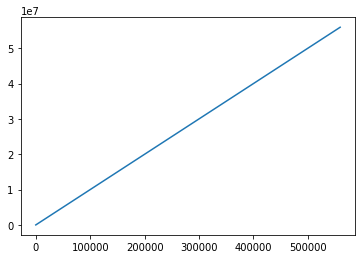

In [51]:
plt.plot(df.millis)

In [ ]:
def fix_millis_time(df):
    idx = np.where( np.diff(df.millis.astype(int))<0 )[0]
    df.loc[idx+1, 'millis'] = np.nan
    df.millis.interpolate(inplace=True)
    df.millis = df.millis.astype(int)
    return df